In [217]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from scipy.optimize import minimize
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
r1 = pd.read_csv("regression_1.csv")
r2 = pd.read_csv("regression_2.csv")
c = pd.read_csv("classification.csv")

In [19]:
def quadratic_function(x, a, b, c):
    return a * (x*x) + b*x + c

def poly_quadratic_function(x, a, b, c, d):
       return a * (x*x*x) + b * (x*x) + c*x + d

In [239]:
def helper(values, x, y):
    # minimize the mean-squared error (MSE)
    return ((y-quadratic_function(x, *values))**2).sum()

def helper_1(values, x, y):
    # minimize the mean-squared error (MSE)
    return ((y-poly_quadratic_function(x, *values))**2).sum()

In [229]:
X = np.asarray(r2['x1'])
y = r2['x2']

t = np.asarray(r1['x1'])
p = r1['x2']

In [240]:
m = minimize(helper, [1, 1, 1], args=(X, y))
s = minimize(helper_1, [1, 1, 1, 1], args=(t, p))

<AxesSubplot:xlabel='x1', ylabel='x2'>

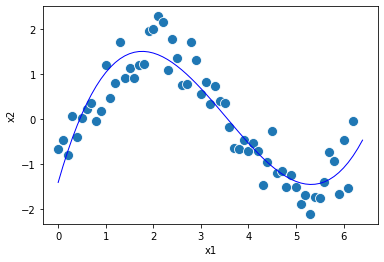

In [264]:
x = np.arange(0.0, 6.5, 0.1)
sin = poly_quadratic_function(x, *s.x)
plt.plot(x, sin, color='blue', linewidth=1)
sns.scatterplot(data=r1, x='x1', y='x2', s=100)

<AxesSubplot:xlabel='x1', ylabel='x2'>

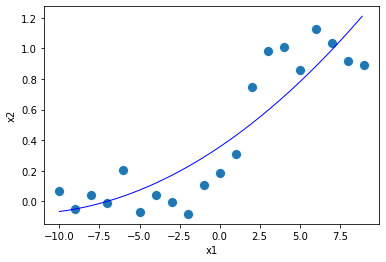

In [266]:
x = np.arange(-10.0, 9.0, 0.1)
parabola_r2 = quadratic_function(x, *m.x)
plt.plot(x, parabola_r2, color='blue', linewidth=1)
sns.scatterplot(data=r2, x='x1', y='x2', s=100)

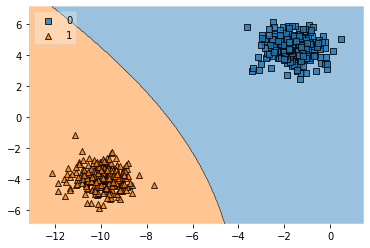

In [272]:
xc, yc = np.c_[c['x1'], c['x2']], c.label
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
svm = SVC(kernel='poly', degree=2)
svm.fit(xc, yc)
plot_decision_regions(xc, np.asarray(yc, dtype='int'), clf=svm, legend=2)
plt.show()